## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read our dataset

In [3]:
ds = pd.read_csv("diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Prepare our features and target

In [4]:
X = ds.drop("Outcome", axis=1)
y = ds.Outcome

## Show features

In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Show target

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Split our dataset to trainset and testset with ratio of 80:20 respectively

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Import our classifiers (Random Forest, KNN, SVM, Logistic Regression, DT) and metrics

In [8]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Random Forest

In [9]:
## Training
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
## Prediction
y_pred_rf = rf.predict(X_test)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy: ", random_forest_score)

Test Accuracy:  0.7012987012987013


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

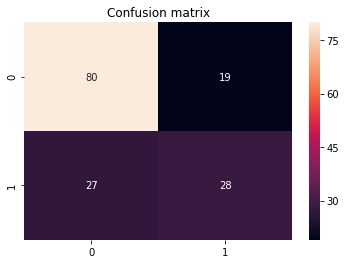

In [11]:
cm = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## SVM

In [12]:
## Training
svc = svm.SVC(gamma="scale")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
## Prediction
y_pred_svm = svc.predict(X_test)
svc_score = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy: ", svc_score)

Test Accuracy:  0.7662337662337663


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

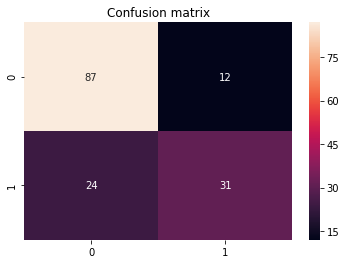

In [14]:
cm = confusion_matrix(y_pred=y_pred_svm, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Logistic Regression

In [15]:
## Training
lr = LogisticRegression(solver="lbfgs", max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
## Prediction
y_pred_lr = lr.predict(X_test)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy: ", logistic_regression_score)

Test Accuracy:  0.7467532467532467


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

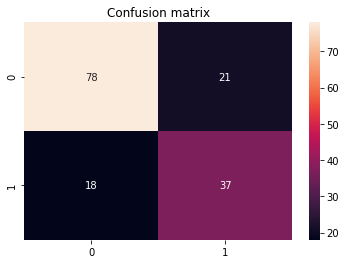

In [17]:
cm = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## KNN

In [18]:
## Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
## Prediction
y_pred_knn = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: ", knn_score)

Test Accuracy:  0.6623376623376623


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

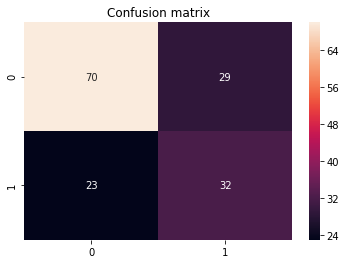

In [20]:
cm = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Neural Networks

In [21]:
## Creating a model
from keras.models import Sequential
from  keras.layers  import Dense

model = Sequential()

# For first layer, input shape must be supplied
layer1 = Dense(units = 16, activation = 'relu', input_dim = X.shape[1])
model.add(layer1)

layer2 = Dense(units = 1, activation = 'sigmoid')
model.add(layer2)

Using TensorFlow backend.


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
614/614 [==============================] - 16s 25ms/step - loss: 5.5915 - acc: 0.6531
Epoch 2/100
614/614 [==============================] - 0s 119us/step - loss: 5.5915 - acc: 0.6531
Epoch 3/100
614/614 [==============================] - 0s 123us/step - loss: 5.5915 - acc: 0.6531
Epoch 4/100
614/614 [==============================] - 0s 112us/step - loss: 5.5915 - acc: 0.6531
Epoch 5/100
614/614 [==============================] - 0s 134us/step - loss: 5.5915 - acc: 0.6531
Epoch 6/100
614/614 [==============================] - 0s 110us/step - loss: 5.5915 - acc: 0.6531
Epoch 7/100
614/614 [==============================] - 0s 119us/step - loss: 5.5915 - acc: 0.6531
Epoch 8/100
614/614 [==============================] - 0s 121us/step - loss: 5.5915 - acc: 0.6531
Epoch 9/100
614/614 [==============================] - 0s 144us/step - loss: 5.5915 - acc: 0.6531
Epoch 10/100
614/614 [==============================] - 0s 110us/step - loss: 5.5915 - acc: 0.6531
Epoch 11/100
614/61

In [24]:
nn_score = model.evaluate(X_test, y_test)[1]

154/154 [==============================] - 0s 262us/step


## Decision Tree

In [25]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [26]:
## Prediction
y_pred_dt = dt.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: ", dt_score)

Test Accuracy:  0.6623376623376623


## Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix')

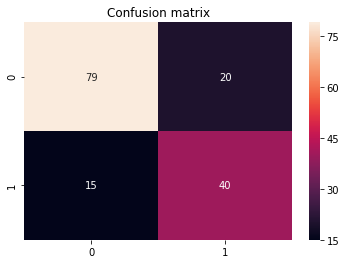

In [27]:
cm = confusion_matrix(y_pred=y_pred_dt, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Comparison between the above Classifiers

In [28]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)
print("Decision Tree Classifier : ", dt_score)
print("Artificial Neural Networks : ", nn_score)

RandomForestClassifier :  0.7012987012987013
K Nearest Neighbors :  0.6623376623376623
Logistic Regression :  0.7467532467532467
Support Vector Classifier :  0.7662337662337663
Decision Tree Classifier :  0.6623376623376623
Artificial Neural Networks :  0.6428571420830566


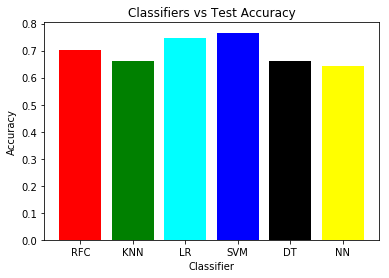

In [29]:
import matplotlib.pyplot as plt

accuracy = [random_forest_score, knn_score, logistic_regression_score, svc_score, dt_score, nn_score]
plt.bar(['RFC', 'KNN', 'LR', 'SVM', 'DT', 'NN'],accuracy, color=['red', 'green', 'cyan', 'blue', 'black', 'yellow'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.title('Classifiers vs Test Accuracy')

plt.show()

## Trying Feature Selection Method

In [30]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
x_selected = sel.fit_transform(X_train)

In [31]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [32]:
dt_score_fs = dt.score(X_test, y_test)
dt_score_fs

0.7532467532467533

### The accuracy of Decision Tree increased from 66% to 75% after feature selection

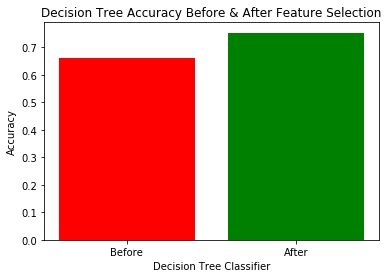

In [33]:
accuracy = [dt_score, dt_score_fs]
plt.bar(['Before', 'After'],accuracy, color=['red', 'green'])
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Accuracy')

plt.title('Decision Tree Accuracy Before & After Feature Selection')

plt.show()

## Decision Tree Graph

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

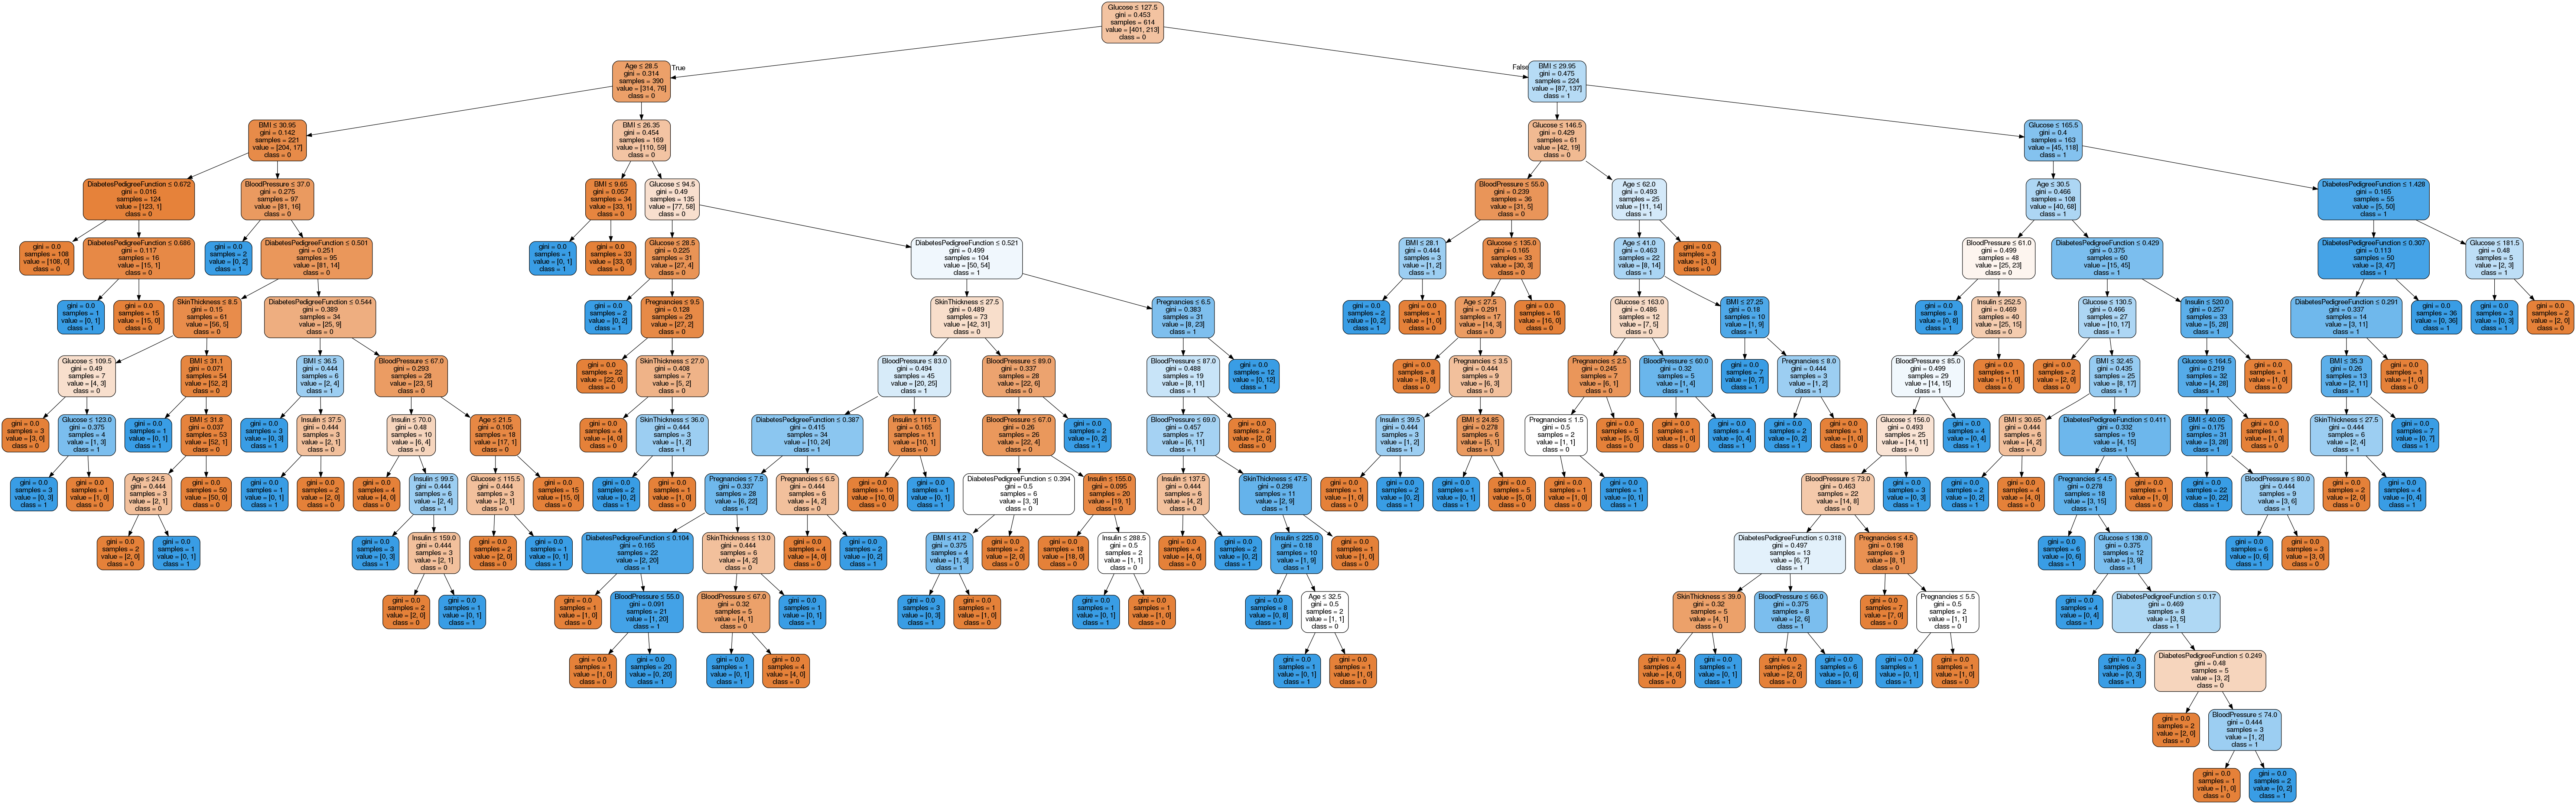

In [35]:
dot_data = StringIO()
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())